# Hierarchical Classification


There are essentially two types of hierachical:

In [1]:
from IPython.display import Image

One is to ignore all taxomy information, and do a single multi class classification.
Otherwise

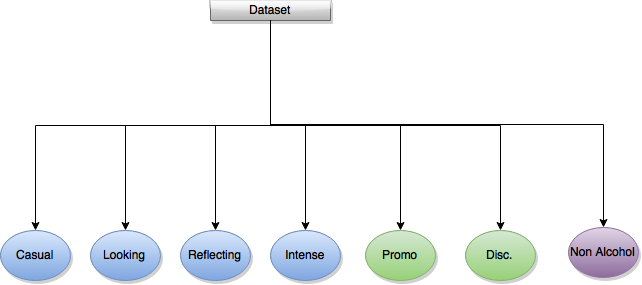

In [2]:
Image(filename='./assets/Classification_flat.png')

Is the other method is to train a classifier in each branch. So there we will need to build and train 3 different classifiers. 

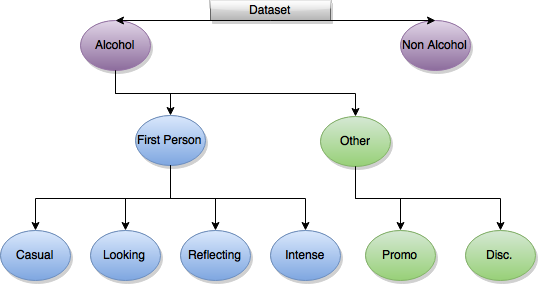

In [3]:
Image(filename='./assets/Classification.png') 

We will focus on building a simple heirarchical model based on on this branching.

1. We will first build three classifiers and evaluate the error independently.
2. Then we will take a look at the error propogation.

In [4]:
from dao import DataAccess, LabelGetter

In [5]:
XX = DataAccess.get_as_dataframe()
XX.head()

,created_at,labels,predict,text,user
_id,,,,,
556e0ee3d6dfbb462880f0a5,Tue Jun 02 20:16:08 +0000 2015,{'alcohol': 0},0.526050,Impatiently waiting to get our hands on the ne...,{'created_at': 'Thu Jun 12 22:14:05 +0000 2014...
556e128ad6dfbb46288111e4,Tue Jun 02 20:31:44 +0000 2015,"{'alcohol_related': 1, 'alcohol': 1, 'first_pe...",0.516649,Beer fans need their @ColumbusBrewing Bodhi. I...,{'created_at': 'Mon Oct 06 21:00:38 +0000 2008...
556e1464d6dfbb4628812330,Tue Jun 02 20:39:37 +0000 2015,{'alcohol': 1},0.502633,Stone Cold use to be the baddest MF in my book...,{'created_at': 'Sun Mar 11 08:22:56 +0000 2012...
556e15f1d6dfbb4628813236,Tue Jun 02 20:46:14 +0000 2015,{'alcohol': 1},0.535758,Now @iamjohnoliver has to drink a Bud Light Li...,{'created_at': 'Thu Jan 14 03:03:33 +0000 2010...
556e1adcd6dfbb50e34a1ed6,Tue Jun 02 21:07:13 +0000 2015,{'alcohol': 0},0.533892,I'm ready for a yard sale and to sell all the...,{'created_at': 'Sun Oct 24 23:02:03 +0000 2010...


### Logistic Regression

For brevity we will only investigate using `sklearn.linear_models.LogisticRegression` with some gridsearch.

In [6]:
from pipelines.alcohol import AlcoholPipeline

from sklearn.linear_model import LogisticRegression

In [9]:
c = AlcoholPipeline().pipeline(LogisticRegression())